<a href="https://colab.research.google.com/github/capela-joao/prova-final-analise/blob/main/ProvaFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Video Game Sales

#Introdução

Este dataset contém informações detalhadas sobre jogos eletrônicos que venderam mais de 100.000 cópias globalmente. Os dados foram extraídos do site VGChartz por meio de um script em Python utilizando a biblioteca BeautifulSoup. Com um total de 16.598 registros, o conjunto de dados apresenta variáveis que incluem o nome do jogo, a plataforma em que foi lançado, o ano de lançamento, o gênero, a publisher e as vendas em diferentes regiões do mundo (América do Norte, Europa, Japão e outros mercados), além do total de vendas globais.

A escolha deste dataset foi motivada pelo meu interesse e familiaridade com o universo dos videogames, uma paixão que cultivo desde a adolescência. Esse contato contínuo com jogos despertou meu interesse em analisar seus padrões de vendas e entender melhor como diferentes fatores, como plataforma e mercado, influenciam o desempenho comercial dos títulos. Dessa forma, este conjunto de dados proporciona uma excelente oportunidade para explorar e investigar tendências dentro da indústria dos jogos eletrônicos.

# Análise descritiva

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

path = "/content/drive/My Drive/analise"

df = pd.read_csv(path + '/vgsales.csv', sep=',')

df.head(10)

Mounted at /content/drive


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [26]:
# Descrição estatística dos dados
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [27]:
# identificar o volume de dados do DataFrame
print(f'O dataset possui {df.shape[0]} entradas (registros) e {df.shape[1]} atributos (variáveis).')

# verificar os tipos de dados dos atributos
print(f'\nOs tipos dos atributos são do tipo:\n{df.dtypes}')

O dataset possui 16598 entradas (registros) e 11 atributos (variáveis).

Os tipos dos atributos são do tipo:
Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [28]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

print(f'As variáveis com mais dados faltantes, em porcentagem (%), são:\n')
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

As variáveis com mais dados faltantes, em porcentagem (%), são:



,0
Year,1.632727
Publisher,0.349440
Rank,0.000000
Name,0.000000
Platform,0.000000
Genre,0.000000
NA_Sales,0.000000
EU_Sales,0.000000
JP_Sales,0.000000
Other_Sales,0.000000


Interpretação verificação de valores ausentes das variáveis:

- As colunas Year e Publisher possuem dados faltantes.

- A variável Year apresenta 1,63% de valores ausentes, o que significa que aproximadamente 271 jogos (1,63% de 16.598) não possuem informação sobre o ano de lançamento.
A variável Publisher tem 0,35% de valores ausentes, ou seja, cerca de 58 jogos não possuem o nome da publicadora registrado.
As demais colunas não apresentam valores ausentes.

- Rank, Name, Platform, Genre e todas as variáveis de vendas regionais (NA_Sales, EU_Sales, etc.) têm 0% de valores faltantes, indicando que os dados estão completos para essas colunas.

In [29]:
df_numeric = df.select_dtypes(include=['number'])  # Seleciona apenas colunas numéricas
mean_values = df_numeric.mean()
median_values = df_numeric.median()
mode_values = df_numeric.mode().iloc[0]

print("Médias:\n", mean_values)
print("Medianas:\n", median_values)
print("Modas:\n", mode_values)

Médias:
 Rank            8300.605254
Year            2006.406443
NA_Sales           0.264667
EU_Sales           0.146652
JP_Sales           0.077782
Other_Sales        0.048063
Global_Sales       0.537441
dtype: float64
Medianas:
 Rank            8300.50
Year            2007.00
NA_Sales           0.08
EU_Sales           0.02
JP_Sales           0.00
Other_Sales        0.01
Global_Sales       0.17
dtype: float64
Modas:
 Rank               1.00
Year            2009.00
NA_Sales           0.00
EU_Sales           0.00
JP_Sales           0.00
Other_Sales        0.00
Global_Sales       0.02
Name: 0, dtype: float64


Interpretação das medidas de tendência central:

- A média global de vendas é relativamente alta (537 mil cópias), mas a mediana
mostra que a maioria dos jogos vende bem menos (170 mil cópias).

- A moda em zero nas vendas indica que há muitos jogos com vendas muito baixas ou inexistentes em algumas regiões.

- A distribuição dos anos de lançamento sugere um pico em 2009, com a maior parte dos jogos lançados entre 2006 e 2007.

- O ranking indica que o jogo mais vendido aparece várias vezes, enquanto os demais jogos estão distribuídos de maneira equilibrada ao longo do ranking.

In [31]:
df_numeric = df.select_dtypes(include=['number'])
variance_values = df_numeric.var()
std_values = df_numeric.std()
range_values = (df_numeric.max() - df_numeric.min())

print("Variância:\n", variance_values)
print("Desvio Padrão:\n", std_values)
print("Amplitude:\n", range_values)

Variância:
 Rank            2.296186e+07
Year            3.397702e+01
NA_Sales        6.669712e-01
EU_Sales        2.553799e-01
JP_Sales        9.566070e-02
Other_Sales     3.556559e-02
Global_Sales    2.418112e+00
dtype: float64
Desvio Padrão:
 Rank            4791.853933
Year               5.828981
NA_Sales           0.816683
EU_Sales           0.505351
JP_Sales           0.309291
Other_Sales        0.188588
Global_Sales       1.555028
dtype: float64
Amplitude:
 Rank            16599.00
Year               40.00
NA_Sales           41.49
EU_Sales           29.02
JP_Sales           10.22
Other_Sales        10.57
Global_Sales       82.73
dtype: float64


Interpretação das medidas de disperção:

- Rank: O ranking apresenta uma distribuição muito ampla, cobrindo toda a faixa possível, sem concentração específica em uma parte do ranking.
- Year: A dispersão nos anos de lançamento é moderada, mas cobre um período extenso. Isso significa que a base tem uma variedade de jogos ao longo das décadas.
- NA_Sales: Há jogos com vendas extremamente altas e outros com vendas muito baixas, indicando que alguns poucos jogos dominam o mercado.
- EU_Sales: As vendas na Europa são um pouco mais concentradas do que na América do Norte, mas ainda há grande variação.
- JP_Sales: O mercado japonês tem menores diferenças de vendas em comparação com América do Norte e Europa. Isso sugere que as vendas são mais equilibradas, sem tantos títulos de vendas extremamente altas.
- Other_Sales: O mercado de "outras regiões" tem um volume menor de vendas no geral, o que explica a baixa dispersão.
- Global_Sales: Há uma grande desigualdade nas vendas globais. Alguns jogos venderam dezenas de milhões de cópias, enquanto a maioria vendeu muito menos.


# Hipótese: jogos lançados para consoles populares (como PS2 e Nintendo DS) tiveram maior volume de vendas globais em comparação com outras plataformas.

In [36]:
# Analisando a hipótese: Plataformas mais vendidas globalmente
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Exibir as 10 plataformas com mais vendas
top_platforms = platform_sales.head(10)
print(top_platforms)


Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
Name: Global_Sales, dtype: float64


<ipython-input-37-abd372d0b53f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_platforms.index, y=top_platforms.values, palette='viridis')


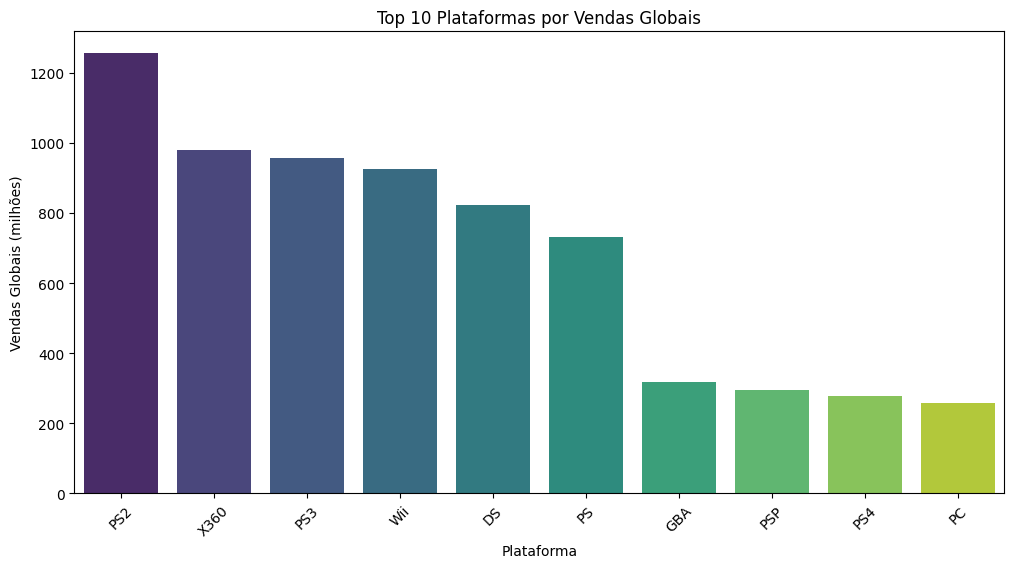

In [37]:
# Criar gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_platforms.index, y=top_platforms.values, palette='viridis')
plt.xlabel("Plataforma")
plt.ylabel("Vendas Globais (milhões)")
plt.title("Top 10 Plataformas por Vendas Globais")
plt.xticks(rotation=45)
plt.show()

Interpretação da análise da hipótese:

Os dados confirmam parcialmente a hipótese. O PS2 e o Nintendo DS realmente tiveram um alto volume de vendas globais, validando a ideia de que plataformas populares acumulam grandes quantidades de cópias vendidas.

No entanto, outros consoles também apresentaram números semelhantes ou superiores ao DS, como o Xbox 360, o PS3 e o Wii. Isso indica que, embora o PS2 e o DS tenham sido altamente populares, eles não foram os únicos consoles a apresentar altos volumes de vendas.

Além disso, algumas plataformas que também foram muito populares, como o PS4 e o PC, tiveram vendas globais mais baixas, o que sugere que fatores como o período de análise, o tipo de público e a disponibilidade de jogos podem ter influenciado os números.

#Teste de Hipóteses

Teste escolhido: ANOVA

Motivo:

A ANOVA foi escolhida porque permite comparar as médias de vendas globais entre várias plataformas ao mesmo tempo. Como há mais de duas plataformas, um teste t de Student não seria ideal. Com a ANOVA, podemos verificar se há uma diferença estatisticamente significativa nas vendas. Se o p-valor for menor que 0.05, rejeitamos a hipótese nula, indicando que pelo menos uma plataforma tem vendas diferentes das outras. Além disso, o código foi ajustado para calcular automaticamente a F-estatística e o p-valor, facilitando a interpretação dos resultados.

In [39]:
import scipy.stats as stats

# Teste ANOVA para comparar vendas globais entre plataformas
selected_platforms = df[df['Platform'].isin(top_platforms.index)]  # Filtra apenas as 10 mais vendidas
anova_result = stats.f_oneway(*[selected_platforms[selected_platforms['Platform'] == platform]['Global_Sales'] for platform in top_platforms.index])

print("Resultado do teste ANOVA:")
print("F-Estatística:", round(anova_result.statistic, 4))
print("p-Valor:", round(anova_result.pvalue, 4))

# Interpretação do resultado
alpha = 0.05
if anova_result.pvalue < alpha:
    print("Rejeitamos a hipótese nula. Há uma diferença estatisticamente significativa nas vendas entre as plataformas.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências estatísticas de diferença nas vendas entre as plataformas.")

Resultado do teste ANOVA:
F-Estatística: 20.6044
p-Valor: 0.0
Rejeitamos a hipótese nula. Há uma diferença estatisticamente significativa nas vendas entre as plataformas.


Interpretação do teste ANOVA:

O teste ANOVA revelou uma F-estatística de 20.6044 e um p-valor de 0.0, indicando uma diferença estatisticamente significativa nas vendas globais entre as plataformas. Como o p-valor é menor que 0.05, rejeitamos a hipótese nula, o que confirma que as vendas não são uniformes entre as plataformas analisadas. Isso reforça que fatores além da popularidade, como biblioteca de jogos e estratégias de mercado, influenciam o volume de vendas.

#Análise de Regressão

In [47]:
import statsmodels.api as sm

df['Popular_Platform'] = df['Platform'].apply(lambda x: 1 if x in ['PS2', 'DS'] else 0)

X = df[['Popular_Platform']]
X = sm.add_constant(X)  # Adiciona o intercepto
y = df['Global_Sales']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     7.815
Date:                Thu, 30 Jan 2025   Prob (F-statistic):            0.00519
Time:                        20:26:02   Log-Likelihood:                -30875.
No. Observations:               16598   AIC:                         6.175e+04
Df Residuals:                   16596   BIC:                         6.177e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5575      0.014  

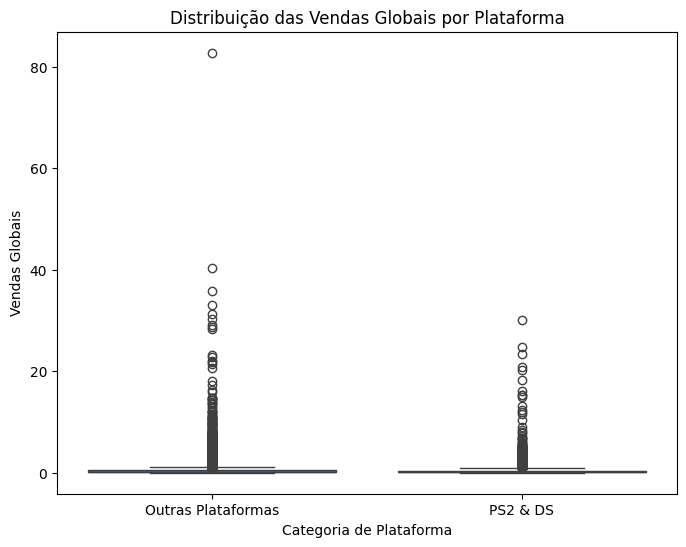

In [48]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Popular_Platform'], y=df['Global_Sales'])
plt.xticks([0, 1], ['Outras Plataformas', 'PS2 & DS'])
plt.xlabel('Categoria de Plataforma')
plt.ylabel('Vendas Globais')
plt.title('Distribuição das Vendas Globais por Plataforma')
plt.show()

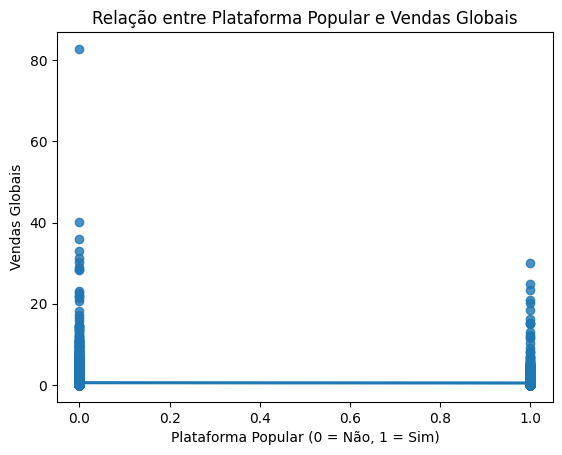

In [49]:
sns.regplot(x=df['Popular_Platform'], y=df['Global_Sales'], logistic=True)
plt.xlabel('Plataforma Popular (0 = Não, 1 = Sim)')
plt.ylabel('Vendas Globais')
plt.title('Relação entre Plataforma Popular e Vendas Globais')
plt.show()

Interpretação da análise de regressão:

Os resultados da regressão indicam que a hipótese inicial, de que jogos lançados para plataformas populares como PS2 e Nintendo DS tiveram maior volume de vendas globais, não se confirmou. Pelo contrário, o coeficiente negativo sugere que esses jogos, em média, venderam ligeiramente menos do que os lançados em outras plataformas. Embora essa diferença seja estatisticamente significativa, ou seja, não é um resultado puramente aleatório, o impacto é pequeno. Além disso, o valor de R² praticamente zerado mostra que a popularidade da plataforma não explica a variação nas vendas globais de maneira relevante. Isso significa que outros fatores, como o ano de lançamento, o gênero do jogo ou até a força da publisher, provavelmente desempenham um papel muito mais importante nas vendas. Para uma análise mais completa, seria interessante incluir essas variáveis e observar quais realmente influenciam o desempenho comercial dos jogos.

#Conclusão

Com base nos resultados da ANOVA e da regressão, podemos concluir que a hipótese inicial não se confirma totalmente. Embora a ANOVA tenha indicado diferenças estatisticamente significativas nas vendas entre as plataformas, a regressão mostrou que lançar jogos em plataformas populares como PS2 e Nintendo DS não garante maior volume de vendas.

O coeficiente negativo na regressão sugere que, em média, os jogos dessas plataformas venderam ligeiramente menos do que os de outras. Além disso, o R² próximo de zero indica que a popularidade da plataforma não explica de forma relevante a variação nas vendas globais. Isso sugere que fatores como ano de lançamento, gênero do jogo e força da publisher podem ter um impacto muito maior no desempenho comercial dos jogos.

Portanto, a hipótese de que plataformas populares resultam automaticamente em maiores vendas não se sustenta, e uma análise mais aprofundada com variáveis adicionais seria necessária para entender os reais determinantes do sucesso comercial dos jogos.
